In [1]:

library(cubature)
library(MASS)
library(pracma)
library(mvtnorm)

library(LogConcDEAD)
library(logcondens) 

library(plot3D)

library(mclust)

Warning message:
“no DISPLAY variable so Tk is not available”
Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm




In [2]:
source('lcic.r')

In [3]:
original_data <- read.csv('Data/wdbc.data', header=FALSE)
original_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720


In [5]:
n_examples = nrow(original_data)
targets_mat <- (original_data[,2]=='M')*1 # Malignant = 1, and Benign = 0

# Clustering with 2 features

In [11]:
predictors_mat <- matrix(0, nrow=n_examples, ncol=2)
predictors_mat[,1] <- original_data[,13]
predictors_mat[,2] <- original_data[,14]

predictors_M = predictors_mat[targets_mat==1,]
predictors_B = predictors_mat[targets_mat==0,]



In [18]:
RealData <- package_real_data(predictors_mat)

In [33]:
num_clusters <- 2
theta_mat_init <- matrix(0, nrow=RealData$n, ncol=num_clusters)
theta_mat_init[,1] <- sample(c(0.3,0.7), size=RealData$n, replace=TRUE)
theta_mat_init[,2] <- 1 - theta_mat_init[,1]
size(theta_mat_init)

[1] 569   2

In [34]:
em_output <- EM_with_lcic(RealData, theta_mat_init, num_clusters, resample_factors=c(4,4), num_iter=20, theps=1e-7)

[1] "Iter: "
[1] 1
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Theta min before = "
[1] 1e-07
[1] "Theta min after = "
[1] 9.999999e-08
[1] "Log-likelihood: "
[1] -0.4334511
[1] "Iter: "
[1] 2
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Theta min before = "
[1] 1e-07
[1] "Theta min after = "
[1] 9.999999e-08
[1] "Log-likelihood: "
[1] -0.4194484
[1] "Iter: "
[1] 3
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Theta min before = "
[1] 1e-07
[1] "Theta min after = "
[1] 9.999999e-08
[1] "Log-likelihood: "
[1] -0.439435
[1] "Iter: "
[1] 4
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Ma

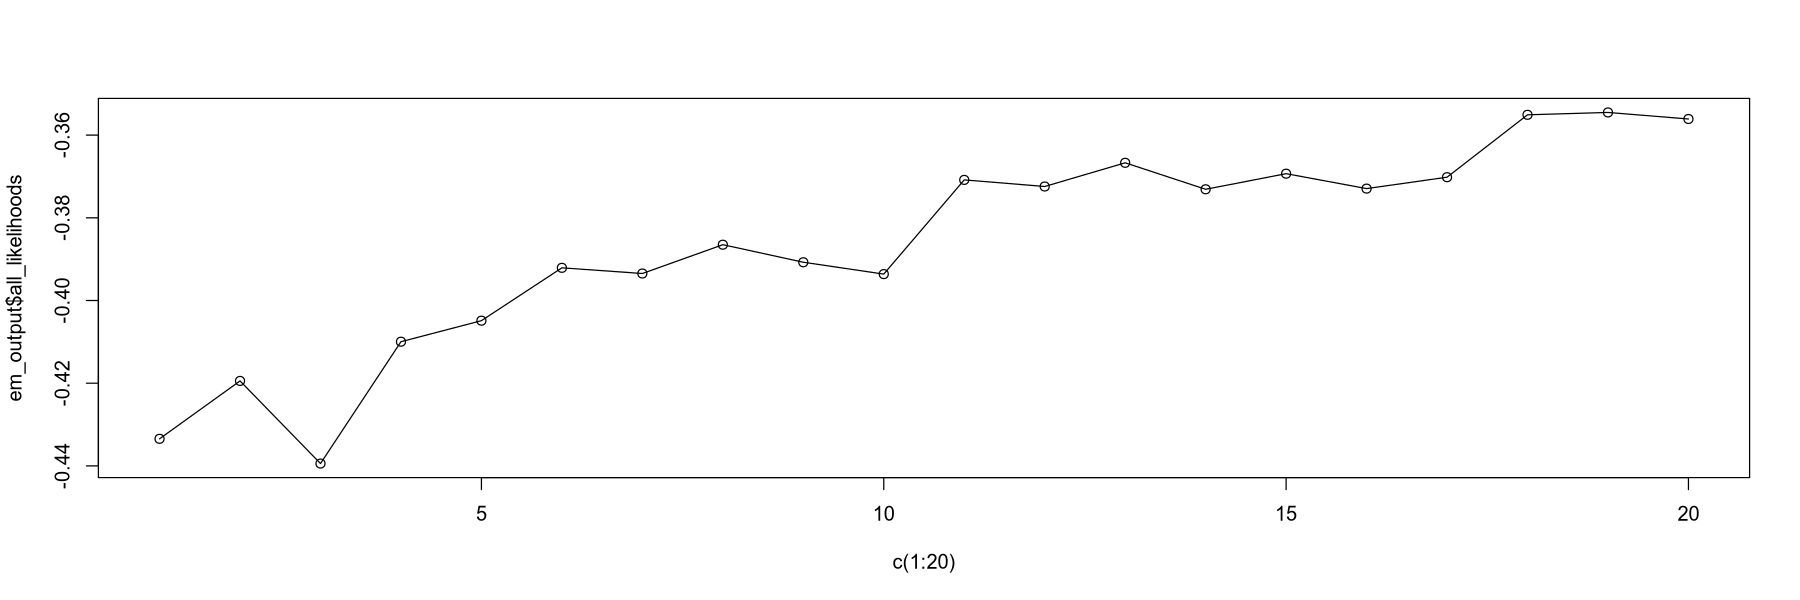

In [36]:
plot(c(1:20), em_output$all_likelihoods)
lines(c(1:20), em_output$all_likelihoods, lty=1)

In [37]:
em_output$pi_vec

[1] 0.2168902 0.7831098

In [23]:
xg <- seq(0, 3.5, by=.05)
yg <- xg

gridmat <- data.matrix(expand.grid(xg, yg))

In [38]:
z_vals_d1 <- evaluate_logcondens_estimator_vectorized(gridmat, em_output$cluster_densities[[1]])
z_vals_d1 <- matrix(z_vals_d1, nrow=length(xg))

z_vals_d2 <- evaluate_logcondens_estimator_vectorized(gridmat, em_output$cluster_densities[[2]])
z_vals_d2 <- matrix(z_vals_d2, nrow=length(xg))

In [55]:
prediction_lcic_g <- (em_output$theta_mat[,1] > 0.5)
prediction_lcic_l <- (em_output$theta_mat[,1] < 0.5)

print(sum(abs(targets_mat - prediction_lcic_g*1)))

# print(sum(abs(targets_mat - prediction_lcic_l)))

[1] 127


In [109]:
1 - 127/RealData$n

1 - 121/RealData$n

[1] 0.7768014

[1] 0.7873462

In [106]:
RealData$n

[1] 569

In [66]:
pdf(file='Results/clustering-figures/clustering-EM-2d.pdf', width=15, height=5)
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 3), mar=c(6,6,4,2))
plot(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.3), cex.lab=2, cex.axis=1.5,
    xlab="Feature 1", ylab="Feature 2", xlim=c(0,3), ylim=c(0,5), main="Ground truth", cex.main=2.5)
points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.3))
legend(x="topright", legend=c("Malignant", "Benign"), col=c(rgb(1,0,0,1), rgb(0,0,1,1)), pch=c(20,20),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

###

# contour(xg, yg, z_vals_d1, xlim=c(0,3), ylim=c(0,5), drawlabels=FALSE, nlevels=8, col=rgb(1,0,0,1), cex.lab=2, cex.axis=1.5,
#     xlab="Feature 1", ylab="Feature 2", main="Estimated densities", cex.main=2.5)
# contour(xg, yg, z_vals_d2, add=TRUE, nlevels=5, col=rgb(0,0,1,1))
# points(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.2))
# points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.2))
# legend(x="topright", legend=c("Density 1", "Density 2"), col=c(rgb(1,0,0,1), rgb(0,0,1,1)), lty=c(1,1),
#        cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

contour(xg, yg, z_vals_d1, xlim=c(0,3), ylim=c(0,5), drawlabels=FALSE, nlevels=8, col=rgb(0,0.5,0,1), cex.lab=2, cex.axis=1.5,
    xlab="Feature 1", ylab="Feature 2", main="Estimated densities", cex.main=2.5)
contour(xg, yg, z_vals_d2, add=TRUE, nlevels=5, col=rgb(0.5,0,0.5,1))
points(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.2))
points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.1))
legend(x="topright", legend=c("Density 1", "Density 2"), col=c(rgb(0,0.5,0,1), rgb(0.5,0,0.5,1)), lty=c(1,1),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

###

plot(x=predictors_mat[prediction_lcic_g,1], y=predictors_mat[prediction_lcic_g,2], pch=20, col=rgb(0,0.5,0,0.3), cex.lab=2, cex.axis=1.5,
    xlab="Feature 1", ylab="Feature 2", xlim=c(0,3), ylim=c(0,5), main="Clustering result", cex.main=2.5)
points(x=predictors_mat[prediction_lcic_l,1], y=predictors_mat[prediction_lcic_l,2], pch=20, col=rgb(0.5,0,0.5,0.3))
legend(x="topright", legend=c("Cluster 1", "Cluster 2"), col=c(rgb(0,0.5,0,1), rgb(0.5,0,0.5,1)), pch=c(20,20),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

dev.off()

png 
  2

In [70]:
pdf(file='Results/clustering-figures/clustering-EM-2d-alt.pdf', width=15, height=5)
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 3), mar=c(6,6,4,2))
plot(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.3), cex.lab=2, cex.axis=1.5,
    xlab="Feature 1", ylab="Feature 2", xlim=c(0,3), ylim=c(0,5), main="Ground truth", cex.main=2.5)
points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.3))
legend(x="topright", legend=c("Malignant", "Benign"), col=c(rgb(1,0,0,1), rgb(0,0,1,1)), pch=c(20,20),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

###

# contour(xg, yg, z_vals_d1, xlim=c(0,3), ylim=c(0,5), drawlabels=FALSE, nlevels=8, col=rgb(1,0,0,1), cex.lab=2, cex.axis=1.5,
#     xlab="Feature 1", ylab="Feature 2", main="Estimated densities", cex.main=2.5)
# contour(xg, yg, z_vals_d2, add=TRUE, nlevels=5, col=rgb(0,0,1,1))
# points(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.2))
# points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.2))
# legend(x="topright", legend=c("Density 1", "Density 2"), col=c(rgb(1,0,0,1), rgb(0,0,1,1)), lty=c(1,1),
#        cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

contour(xg, yg, z_vals_d1, xlim=c(0,3), ylim=c(0,5), drawlabels=FALSE, nlevels=8, col=rgb(0.5,0,0.5,1), cex.lab=2, cex.axis=1.5,
    xlab="Feature 1", ylab="Feature 2", main="Estimated densities", cex.main=2.5)
contour(xg, yg, z_vals_d2, add=TRUE, nlevels=6, col=rgb(0,0.6,0,1))
points(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.2))
points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.1))
legend(x="topright", legend=c("Density 1", "Density 2"), col=c(rgb(0.5,0,0.5,1), rgb(0,0.6,0,1)), lty=c(1,1),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

###

plot(x=predictors_mat[prediction_lcic_g,1], y=predictors_mat[prediction_lcic_g,2], pch=20, col=rgb(0.5,0,0.5,0.3), cex.lab=2, cex.axis=1.5,
    xlab="Feature 1", ylab="Feature 2", xlim=c(0,3), ylim=c(0,5), main="Clustering result", cex.main=2.5)
points(x=predictors_mat[prediction_lcic_l,1], y=predictors_mat[prediction_lcic_l,2], pch=20, col=rgb(0,0.6,0,0.3))
legend(x="topright", legend=c("Cluster 1", "Cluster 2"), col=c(rgb(0.5,0,0.5,1), rgb(0,0.6,0,1)), pch=c(20,20),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

dev.off()

png 
  2

# Clustering in high dimensions

In [71]:
features_mat <- data.matrix(original_data[ , 3:32])
features_mat

V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,⋯,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [72]:
pca_res <- princomp(x=features_mat, scores=TRUE)

In [73]:
RealDataHD <- package_real_data(features_mat)

In [80]:
theta_mat_init_hc <- initialize_EM(RealDataHD, num_clusters)

In [81]:
em_output_HD <- EM_with_lcic(RealDataHD, theta_mat_init_hc, num_clusters, resample_factors=c(4,4), num_iter=15, theps=1e-7)

[1] "Iter: "
[1] 1
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Marginal: "
[1] 3
[1] "Marginal: "
[1] 4
[1] "Marginal: "
[1] 5
[1] "Marginal: "
[1] 6
[1] "Marginal: "
[1] 7
[1] "Marginal: "
[1] 8
[1] "Marginal: "
[1] 9
[1] "Marginal: "
[1] 10
[1] "Marginal: "
[1] 11
[1] "Marginal: "
[1] 12
[1] "Marginal: "
[1] 13
[1] "Marginal: "
[1] 14
[1] "Marginal: "
[1] 15
[1] "Marginal: "
[1] 16
[1] "Marginal: "
[1] 17
[1] "Marginal: "
[1] 18
[1] "Marginal: "
[1] 19
[1] "Marginal: "
[1] 20
[1] "Marginal: "
[1] 21
[1] "Marginal: "
[1] 22
[1] "Marginal: "
[1] 23
[1] "Marginal: "
[1] 24
[1] "Marginal: "
[1] 25
[1] "Marginal: "
[1] 26
[1] "Marginal: "
[1] 27
[1] "Marginal: "
[1] 28
[1] "Marginal: "
[1] 29
[1] "Marginal: "
[1] 30
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Marginal: "
[1] 3
[1] "Marginal: "
[1] 4
[1] "Marginal: "
[1] 5
[1] "Marginal: "
[1] 6
[1] "Marginal: "
[1] 7
[1] "Marginal: "
[1] 8
[1

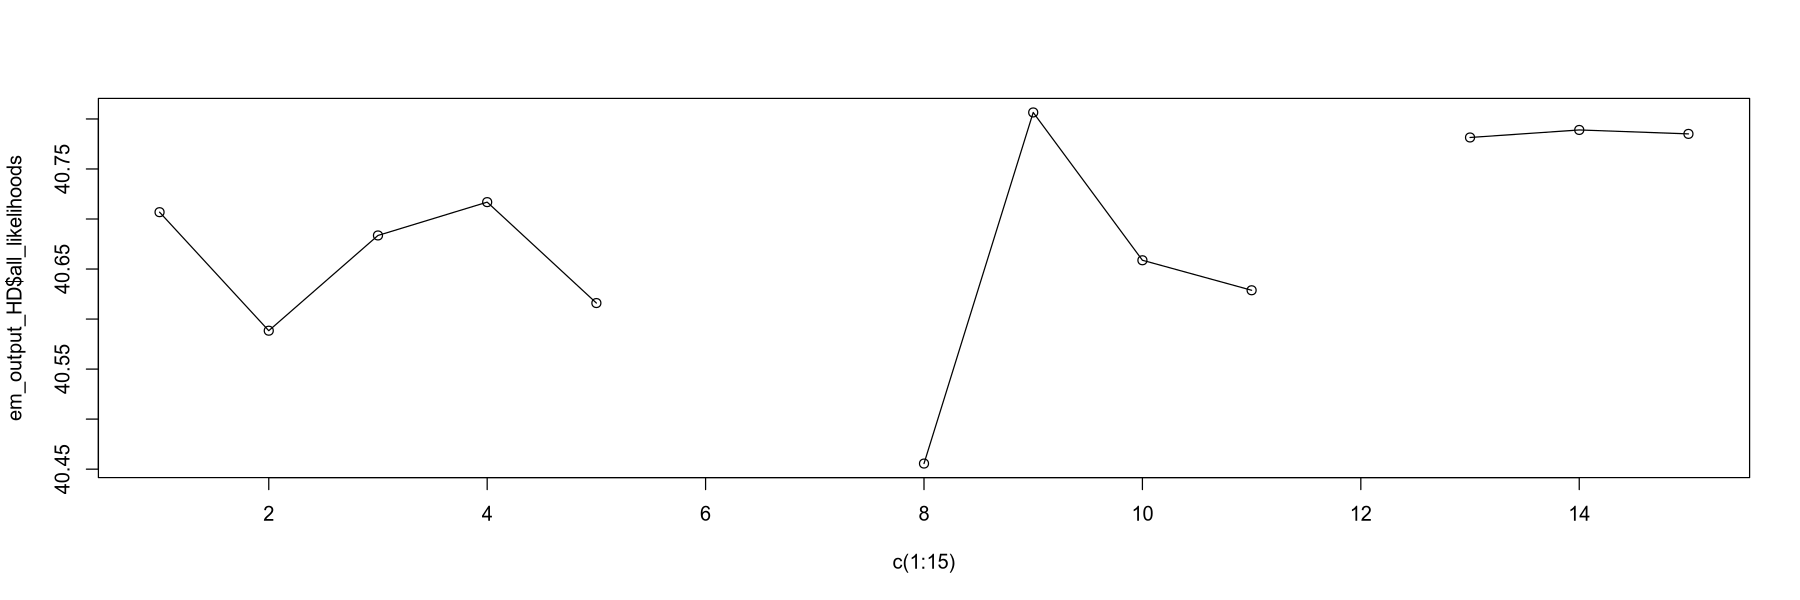

In [82]:
plot(c(1:15), em_output_HD$all_likelihoods)
lines(c(1:15), em_output_HD$all_likelihoods, lty=1)

In [83]:
em_output_HD$pi_vec

[1] 0.3047782 0.6952218

In [84]:
prediction_lcic_g_HD <- (em_output_HD$theta_mat[,1] > 0.5)
prediction_lcic_l_HD <- (em_output_HD$theta_mat[,1] < 0.5)

prediction_hc_g <- (theta_mat_init_hc[,1] > 0.5)*1
prediction_hc_l <- (theta_mat_init_hc[,1] < 0.5)*1

print("LCIC")
print(sum(abs(targets_mat - prediction_lcic_g_HD*1)))

print(sum(abs(targets_mat - prediction_lcic_l_HD*1)))

print("HC")
print(sum(abs(targets_mat - prediction_hc_g)))

print(sum(abs(targets_mat - prediction_hc_l)))


[1] "LCIC"
[1] 59
[1] 510
[1] "HC"
[1] 78
[1] 491


In [112]:
1 - 59/RealDataHD$n
1 - 78/RealDataHD$n

[1] 0.8963093

[1] 0.8629174

In [85]:
# Plotting densities
xg <- seq(-1000, 1500, by=10)
yg <- seq(-200, 200, by=10)

gridmat <- data.matrix(expand.grid(xg, yg))
num_pcs <- 30
gridmat_padded <- matrix(0, nrow=nrow(gridmat), ncol=30)
gridmat_padded[ , 1:2] <- gridmat
gridmat_padded

-1000,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-990,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-980,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-970,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-960,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-950,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-940,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-930,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-920,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-910,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-900,-200,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [86]:
z_vals_d1 <- evaluate_logcondens_estimator_vectorized(map_to_data_space(gridmat_padded, pca_res), em_output_HD$cluster_densities[[1]])
z_vals_d1 <- matrix(z_vals_d1, nrow=length(xg))

z_vals_d2 <- evaluate_logcondens_estimator_vectorized(map_to_data_space(gridmat_padded, pca_res), em_output_HD$cluster_densities[[2]])
z_vals_d2 <- matrix(z_vals_d2, nrow=length(xg))

In [105]:
pdf(file='Results/clustering-figures/clustering-EM-30d-alt.pdf', width=15, height=5)
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 3), mar=c(6,6,4,2))
plot(x=pca_res$scores[targets_mat==1,1], y=pca_res$scores[targets_mat==1,2], pch=20, col=rgb(1,0,0,0.3), cex.lab=2, cex.axis=1.5,
    xlab="PC 1", ylab="PC 2", xlim=c(-1000,2000), ylim=c(-300,300), main="Ground truth", cex.main=2.5)
points(x=pca_res$scores[targets_mat==0,1], y=pca_res$scores[targets_mat==0,2], pch=20, col=rgb(0,0,1,0.2))
legend(x="topright", legend=c("Malignant", "Benign"), col=c(rgb(1,0,0,1), rgb(0,0,1,1)), pch=c(20,20),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

###

# contour(xg, yg, z_vals_d1, xlim=c(0,3), ylim=c(0,5), drawlabels=FALSE, nlevels=8, col=rgb(1,0,0,1), cex.lab=2, cex.axis=1.5,
#     xlab="Feature 1", ylab="Feature 2", main="Estimated densities", cex.main=2.5)
# contour(xg, yg, z_vals_d2, add=TRUE, nlevels=5, col=rgb(0,0,1,1))
# points(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.2))
# points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.2))
# legend(x="topright", legend=c("Density 1", "Density 2"), col=c(rgb(1,0,0,1), rgb(0,0,1,1)), lty=c(1,1),
#        cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

contour(xg, yg, z_vals_d1, xlim=c(-1000,2000), ylim=c(-300,300), drawlabels=FALSE, nlevels=10, col=rgb(0.5,0,0.5,1), cex.lab=2, cex.axis=1.5,
    xlab="PC 1", ylab="PC 2", main="Estimated densities", cex.main=2.5)
contour(xg, yg, z_vals_d2, add=TRUE, nlevels=4, col=rgb(0,0.6,0,1), lwd=1.5)
points(x=pca_res$scores[targets_mat==1,1], y=pca_res$scores[targets_mat==1,2], pch=20, col=rgb(1,0,0,0.1))
points(x=pca_res$scores[targets_mat==0,1], y=pca_res$scores[targets_mat==0,2], pch=20, col=rgb(0,0,1,0.06))
legend(x="topright", legend=c("Density 1", "Density 2"), col=c(rgb(0.5,0,0.5,1), rgb(0,0.6,0,1)), lty=c(1,1),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

###

plot(x=pca_res$scores[prediction_lcic_g_HD,1], y=pca_res$scores[prediction_lcic_g_HD,2], pch=20, col=rgb(0.5,0,0.5,0.3), cex.lab=2, cex.axis=1.5,
    xlab="PC 1", ylab="PC 2", xlim=c(-1000,2000), ylim=c(-300,300), main="Clustering result", cex.main=2.5)
points(x=pca_res$scores[prediction_lcic_l_HD,1], y=pca_res$scores[prediction_lcic_l_HD,2], pch=20, col=rgb(0,0.6,0,0.3))
legend(x="topright", legend=c("Cluster 1", "Cluster 2"), col=c(rgb(0.5,0,0.5,1), rgb(0,0.6,0,1)), pch=c(20,20),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

dev.off()

png 
  2